In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
def read_images_from_dirs(common_path, paths, endings):
    dirs = [f"{common_path}{path}" for path in paths]
    images_dirs = [[f for f in sorted(os.listdir(dir)) if f.endswith(ending)] for dir, ending in zip(dirs, endings)]
    return dirs, images_dirs

In [54]:
def plot_side_by_side(dirs, images_dirs, title=""):
    max_len = max(len(images_dir) for images_dir in images_dirs)
    fig, axes = plt.subplots(nrows=max_len, ncols=len(images_dirs), figsize=(len(images_dirs)*3, max_len * 2))

    for i in range(max_len):
        for j in range(len(images_dirs)):
        # Plot from the first directory (if available)
            if i < len(images_dirs[j]):
                img1 = Image.open(os.path.join(dirs[j], images_dirs[j][i]))
                axes[i, j].imshow(img1)
                axes[i, j].set_title(f"{images_dirs[j][i]}", fontsize=8)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off') 

    plt.suptitle(title)
    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the title
    plt.subplots_adjust(top=0.92)  # Adjust the position of the title
    plt.savefig(f"/home/anna/Dokumenty/report_Mandrac/{title}.jpg")
    plt.show()

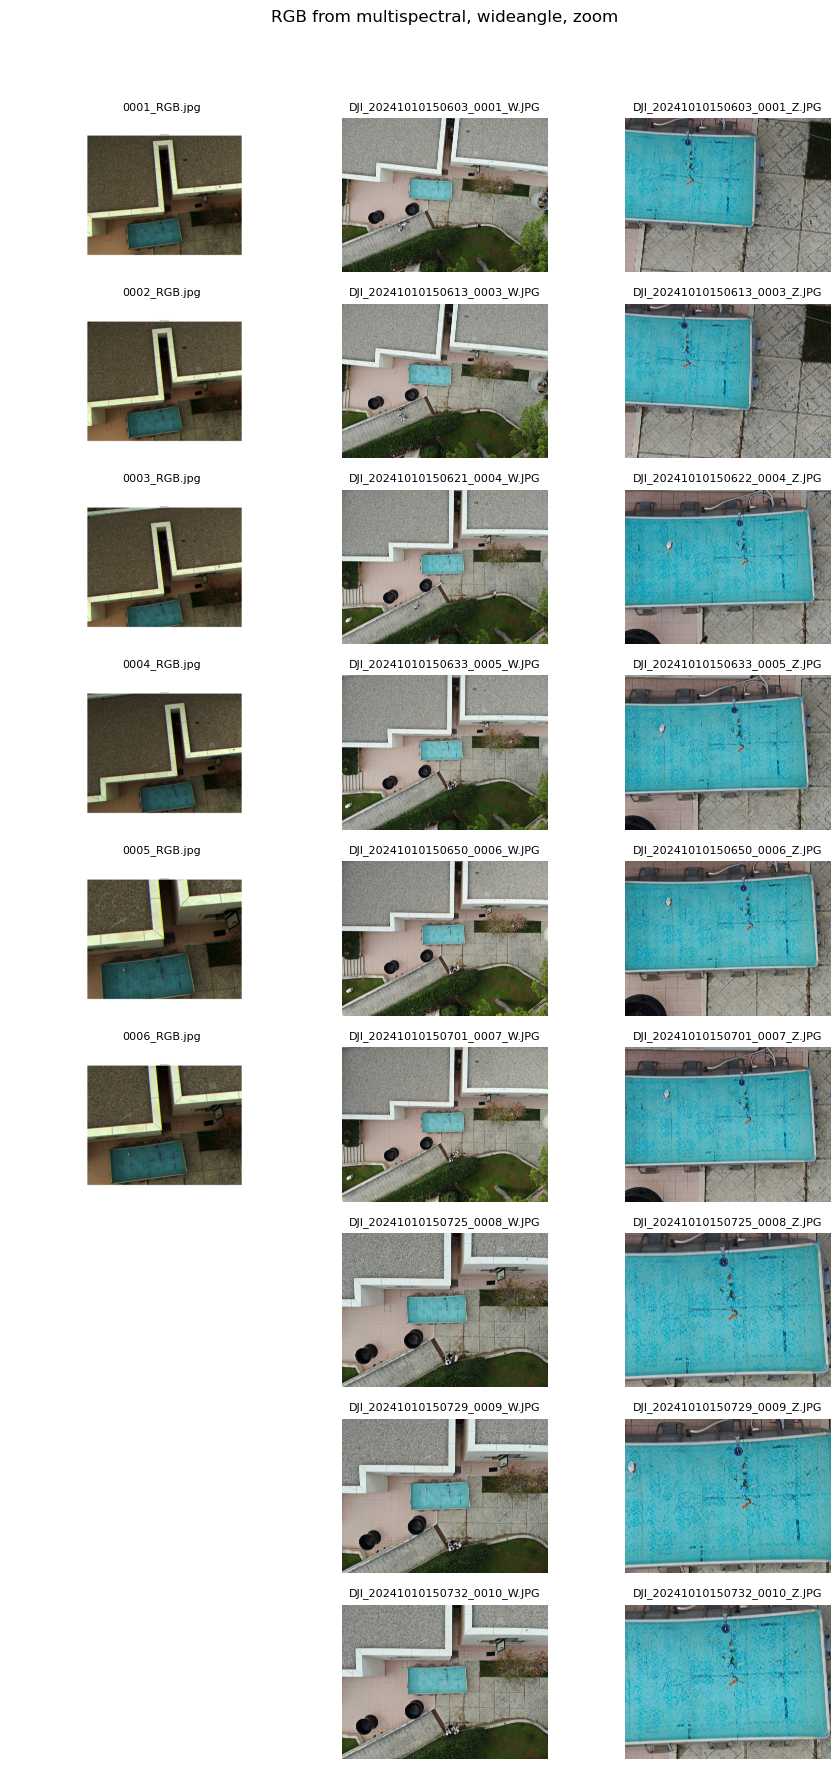

In [55]:
dirs, images = read_images_from_dirs("/home/anna/Obrazy/h20T_multis/0018SET/", ["out_multis", "DJI_202410101453_011", "DJI_202410101453_011"], ["_RGB.jpg", "_W.JPG", "_Z.JPG"])
plot_side_by_side(dirs, images, "RGB from multispectral, wideangle, zoom")

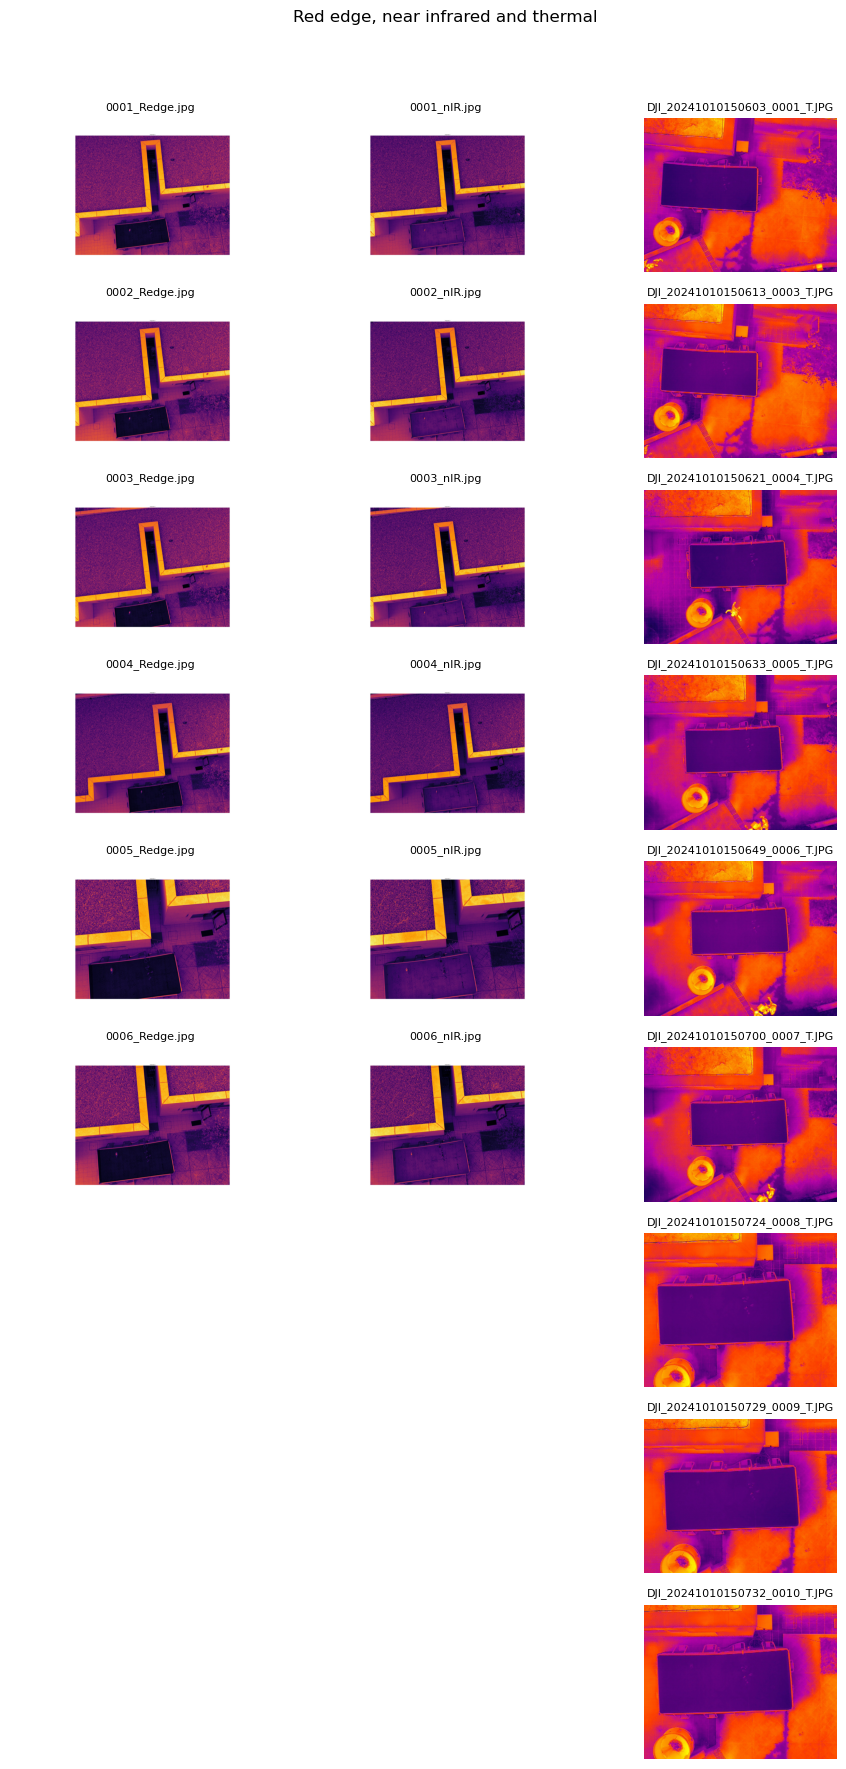

In [56]:
dirs, images_dirs = read_images_from_dirs("/home/anna/Obrazy/h20T_multis/0018SET/", ["out_multis", "out_multis", "DJI_202410101453_011"], ["_Redge.jpg", "_nIR.jpg", "_T.JPG"])
plot_side_by_side(dirs, images_dirs, "Red edge, near infrared and thermal")